In [1]:
import numpy as np
# Define two input signals
x = [1, 2, 3, 4]
h = [1, 0, -1]
# Perform linear convolution using numpy
linear_conv = np.convolve(x, h)
print("Linear Convolution: ", linear_conv) 


Linear Convolution:  [ 1  2  2  2 -3 -4]


In [2]:
# Define two input signals
x = [1, 2, 3, 4]
h = [1, 0, -1]

# Determine the length for circular convolution
N = max(len(x), len(h))
# Zero-pad the shorter sequence to match the length of the longer one
x_padded = np.pad(x, (0, N - len(x)), mode='constant')
h_padded = np.pad(h, (0, N - len(h)), mode='constant')
# Perform circular convolution using FFT
X_fft = np.fft.fft(x_padded)
H_fft = np.fft.fft(h_padded)
circular_conv = np.fft.ifft(X_fft * H_fft)
# Only the real part is considered (since the imaginary part should be zero)
circular_conv = np.real(circular_conv)
print("Circular Convolution: ", circular_conv)


Circular Convolution:  [-2. -2.  2.  2.]


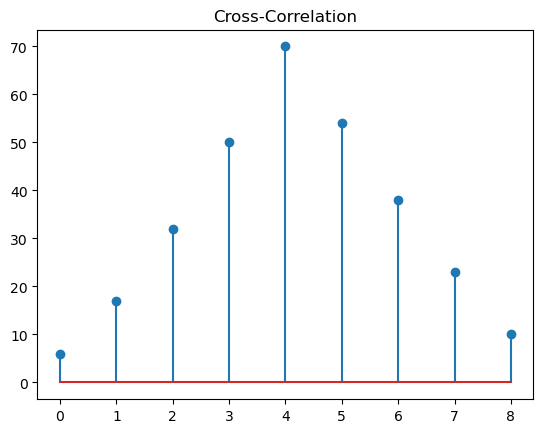

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define two signals
x = np.array([1, 2, 3, 4, 5])
y = np.array([2, 3, 4, 5, 6])

# Perform cross-correlation using numpy
cross_corr = np.correlate(x, y, mode='full')

# Plot cross-correlation
plt.stem(cross_corr)
plt.title('Cross-Correlation')
plt.show()


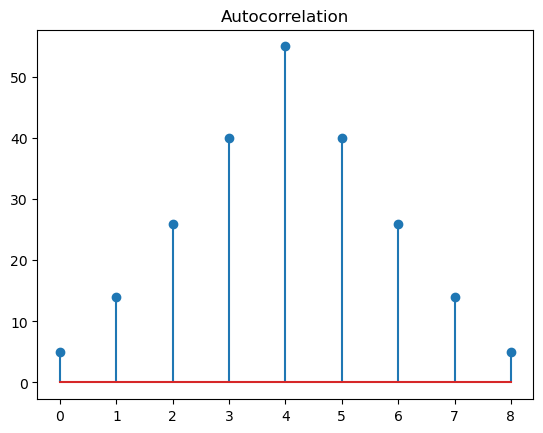

In [4]:
# Define a signal
x = np.array([1, 2, 3, 4, 5])
# Perform autocorrelation using numpy
auto_corr = np.correlate(x, x, mode='full')
# Plot autocorrelation
plt.stem(auto_corr)
plt.title('Autocorrelation')
plt.show()


Signal length: 1000
Impulse length: 200
Linear result: 1199
Circular result: 1000


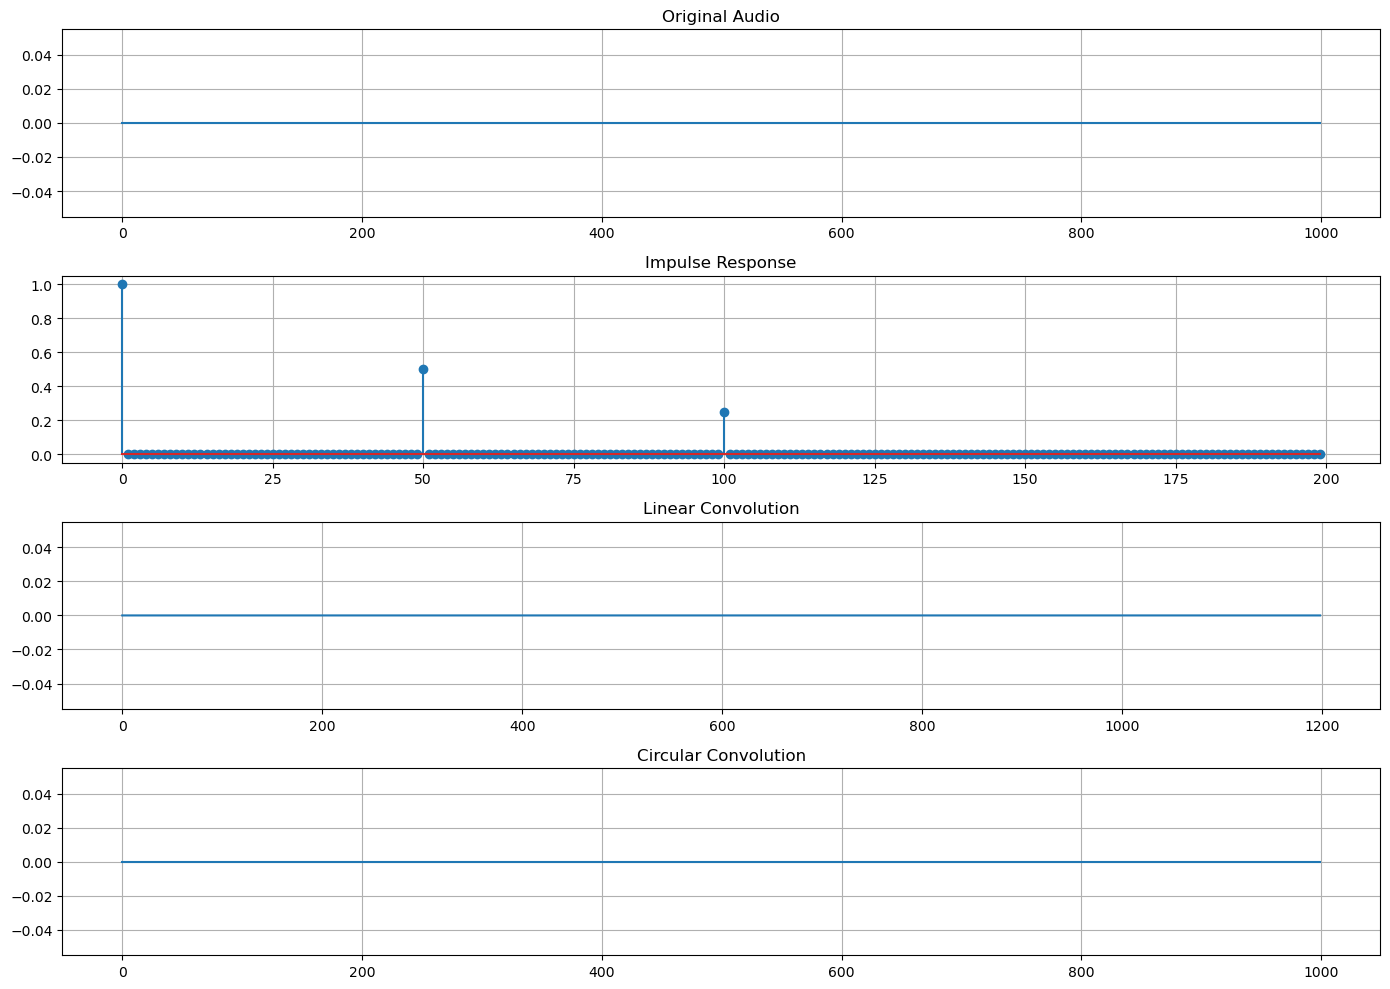

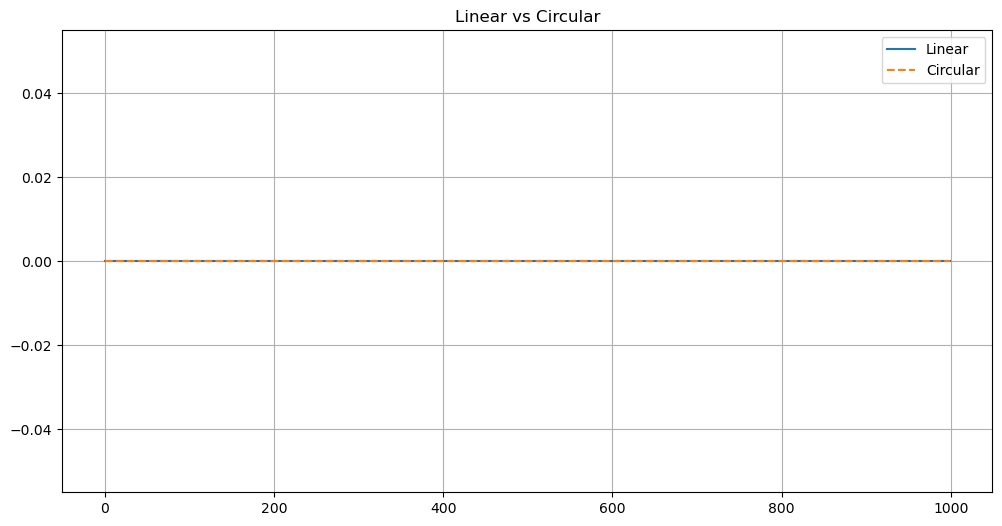

Done! Files saved.


C:\Users\asusn\AppData\Local\Temp\ipykernel_3036\2537032360.py:76: RuntimeWarning: invalid value encountered in divide
  linear_out = np.int16(linear / np.max(np.abs(linear)) * 32767)
C:\Users\asusn\AppData\Local\Temp\ipykernel_3036\2537032360.py:76: RuntimeWarning: invalid value encountered in cast
  linear_out = np.int16(linear / np.max(np.abs(linear)) * 32767)
C:\Users\asusn\AppData\Local\Temp\ipykernel_3036\2537032360.py:77: RuntimeWarning: invalid value encountered in divide
  circular_out = np.int16(circular / np.max(np.abs(circular)) * 32767)
C:\Users\asusn\AppData\Local\Temp\ipykernel_3036\2537032360.py:77: RuntimeWarning: invalid value encountered in cast
  circular_out = np.int16(circular / np.max(np.abs(circular)) * 32767)


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Load audio
rate, audio = wavfile.read('- SHRI HANUMAN CHALISA.wav')

# Convert stereo to mono
if len(audio.shape) > 1:
    audio = audio[:, 0]

# Normalize
audio = audio / np.max(np.abs(audio))

# Use first 1000 samples
signal = audio[:1000]

# Create impulse response (echo)
impulse = np.zeros(200)
impulse[0] = 1.0
impulse[50] = 0.5
impulse[100] = 0.25

print("Signal length:", len(signal))
print("Impulse length:", len(impulse))

# LINEAR CONVOLUTION
linear = np.convolve(signal, impulse, mode='full')
print("Linear result:", len(linear))

# CIRCULAR CONVOLUTION
N = max(len(signal), len(impulse))
sig_pad = np.pad(signal, (0, N - len(signal)))
imp_pad = np.pad(impulse, (0, N - len(impulse)))
circular = np.real(np.fft.ifft(np.fft.fft(sig_pad) * np.fft.fft(imp_pad)))
print("Circular result:", len(circular))

# PLOT
plt.figure(figsize=(14, 10))

plt.subplot(4, 1, 1)
plt.plot(signal)
plt.title('Original Audio')
plt.grid(True)

plt.subplot(4, 1, 2)
plt.stem(impulse)
plt.title('Impulse Response')
plt.grid(True)

plt.subplot(4, 1, 3)
plt.plot(linear)
plt.title('Linear Convolution')
plt.grid(True)

plt.subplot(4, 1, 4)
plt.plot(circular)
plt.title('Circular Convolution')
plt.grid(True)

plt.tight_layout()
plt.savefig('convolution.png')
plt.show()

# COMPARISON
plt.figure(figsize=(12, 6))
plt.plot(linear[:N], label='Linear')
plt.plot(circular, label='Circular', linestyle='--')
plt.title('Linear vs Circular')
plt.legend()
plt.grid(True)
plt.savefig('comparison.png')
plt.show()

# Save audio
linear_out = np.int16(linear / np.max(np.abs(linear)) * 32767)
circular_out = np.int16(circular / np.max(np.abs(circular)) * 32767)
wavfile.write('linear_output.wav', rate, linear_out)
wavfile.write('circular_output.wav', rate, circular_out)

print("Done! Files saved.")

Error: [Errno 2] No such file or directory: 'clean_audio.wav'
Creating sample audio signals for demonstration...

Cross-correlation completed!
Clean vs Noisy: 9999 samples
Clean vs Periodic: 9999 samples

Autocorrelation completed!


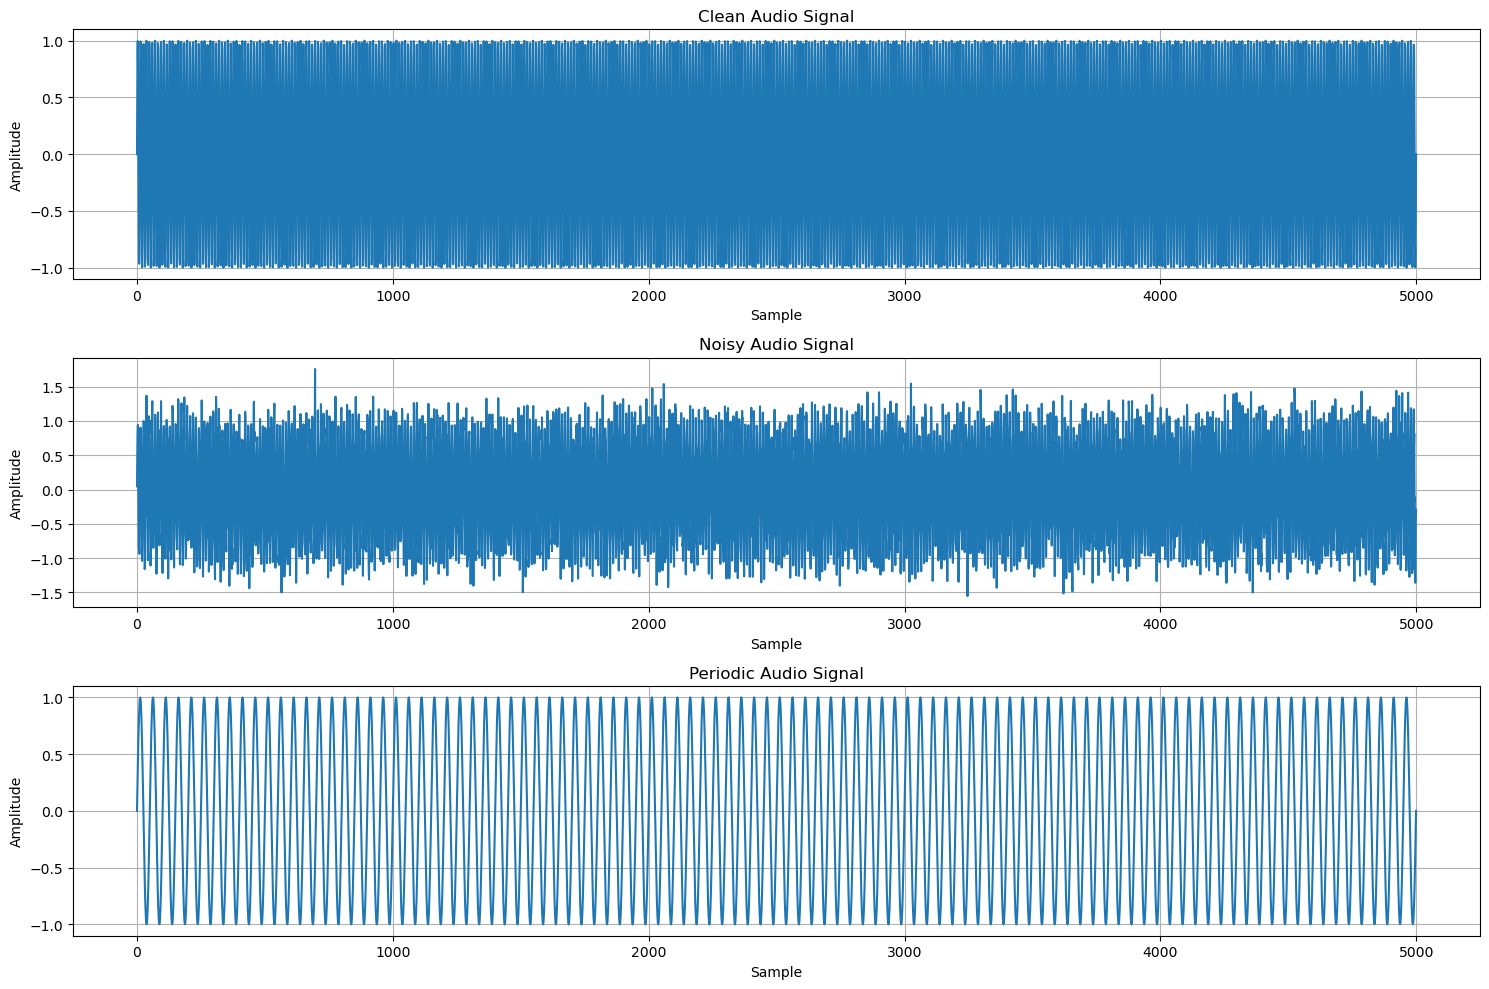

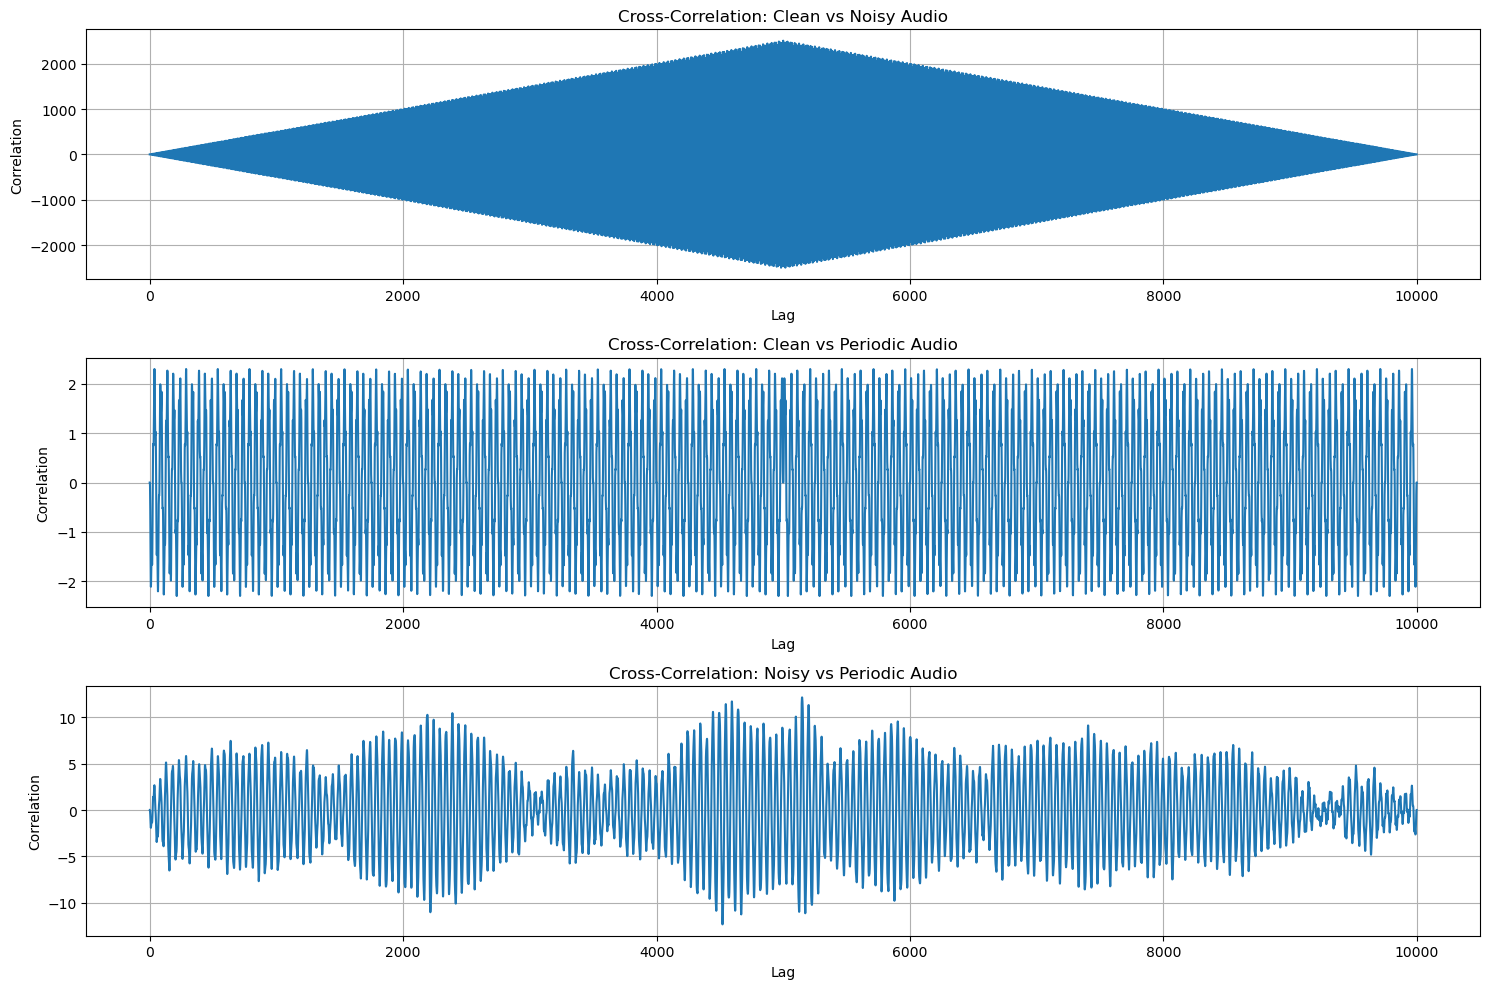

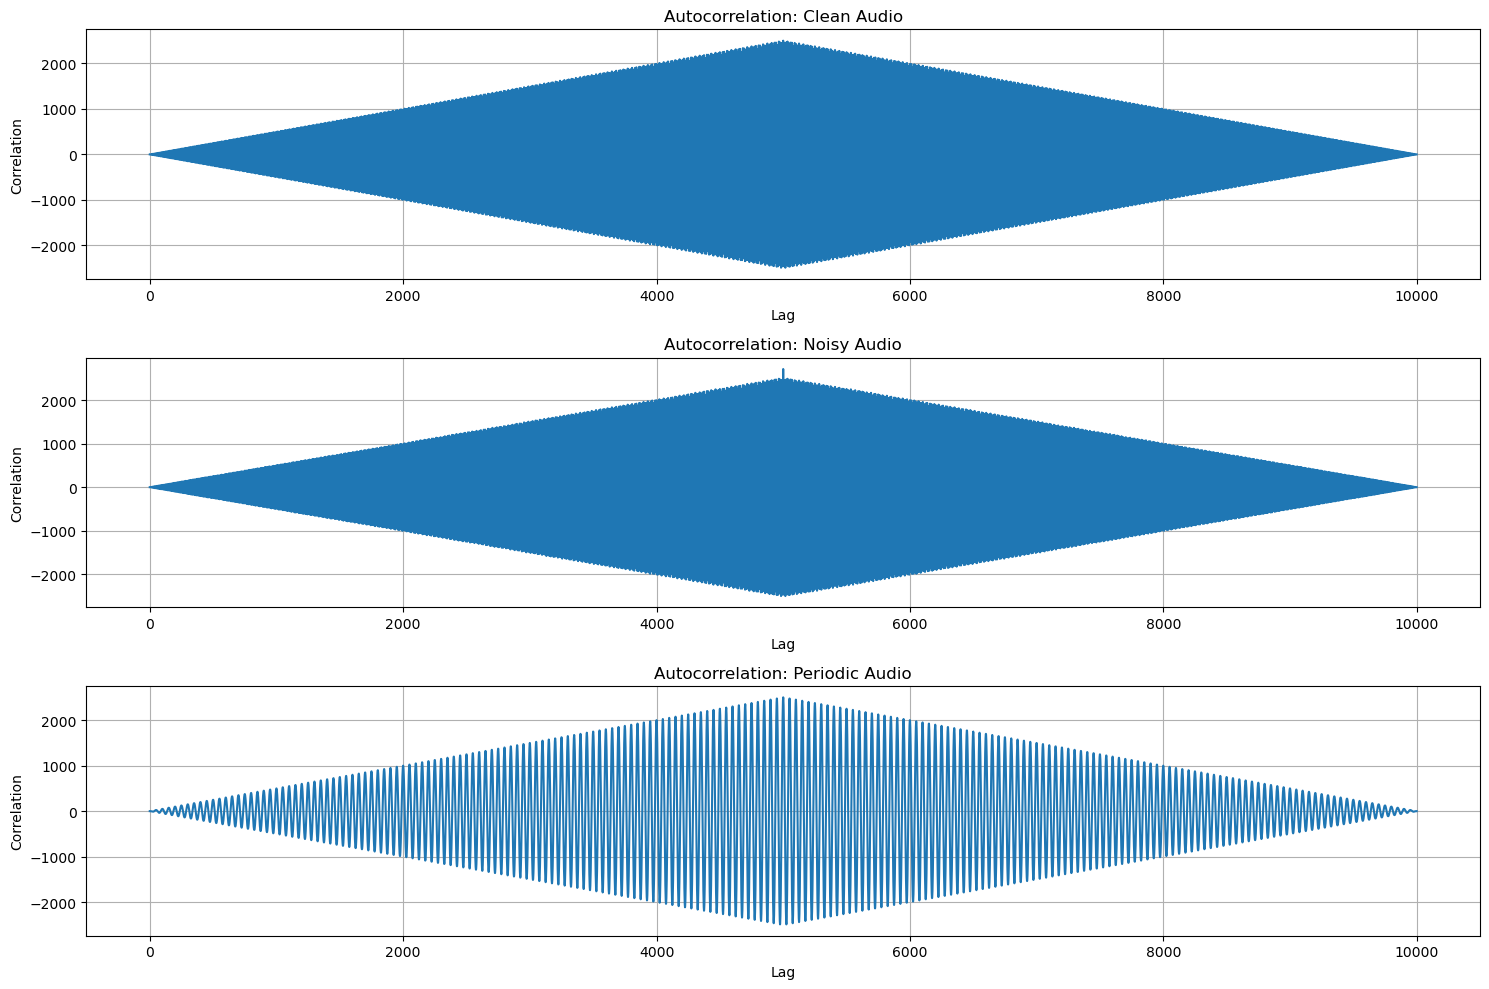

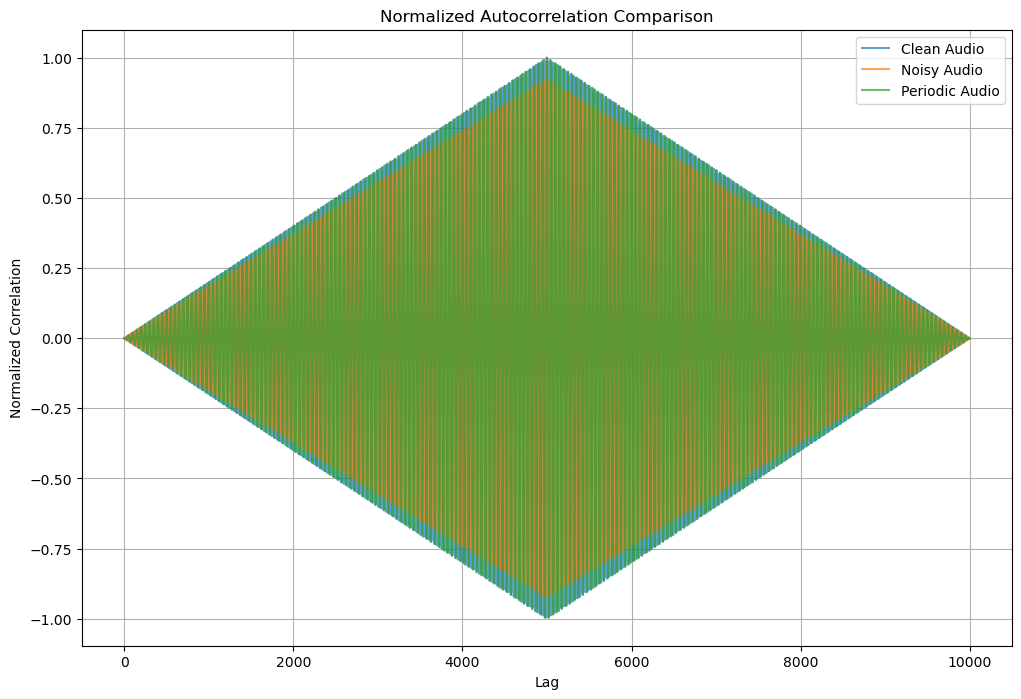


=== Correlation Statistics ===
Max cross-correlation (Clean-Noisy): 2505.46
Max cross-correlation (Clean-Periodic): 2.30
Max autocorrelation (Clean): 2499.50
Max autocorrelation (Noisy): 2713.01
Max autocorrelation (Periodic): 2499.50

All results saved as PNG files!


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Function to read and prepare audio data
def load_audio(filename):
    """Load audio file and convert to mono if needed"""
    sample_rate, audio_data = wavfile.read(filename)
    
    # If stereo, convert to mono
    if len(audio_data.shape) > 1:
        audio_data = audio_data[:, 0]
    
    # Normalize
    audio_data = audio_data / np.max(np.abs(audio_data))
    
    # Take first 5000 samples for faster processing
    audio_data = audio_data[:5000]
    
    return sample_rate, audio_data

# Load the three audio files
# Replace these with your actual file names
try:
    sr1, clean_audio = load_audio('clean_audio.wav')
    sr2, noisy_audio = load_audio('noisy_audio.wav')
    sr3, periodic_audio = load_audio('periodic_audio.wav')
    
    print("Audio files loaded successfully!")
    print(f"Clean audio length: {len(clean_audio)}")
    print(f"Noisy audio length: {len(noisy_audio)}")
    print(f"Periodic audio length: {len(periodic_audio)}")
    
except FileNotFoundError as e:
    print(f"Error: {e}")
    print("Creating sample audio signals for demonstration...")
    
    # Create sample signals for demonstration
    t = np.linspace(0, 1, 5000)
    clean_audio = np.sin(2 * np.pi * 440 * t)  # 440 Hz sine wave
    noisy_audio = clean_audio + 0.2 * np.random.randn(5000)  # Add noise
    periodic_audio = np.sin(2 * np.pi * 100 * t)  # 100 Hz sine wave

# ======================
# CROSS-CORRELATION
# ======================

# Cross-correlation between clean and noisy audio
cross_corr_clean_noisy = np.correlate(clean_audio, noisy_audio, mode='full')

# Cross-correlation between clean and periodic audio
cross_corr_clean_periodic = np.correlate(clean_audio, periodic_audio, mode='full')

# Cross-correlation between noisy and periodic audio
cross_corr_noisy_periodic = np.correlate(noisy_audio, periodic_audio, mode='full')

print("\nCross-correlation completed!")
print(f"Clean vs Noisy: {len(cross_corr_clean_noisy)} samples")
print(f"Clean vs Periodic: {len(cross_corr_clean_periodic)} samples")

# ======================
# AUTOCORRELATION
# ======================

# Autocorrelation of clean audio
auto_corr_clean = np.correlate(clean_audio, clean_audio, mode='full')

# Autocorrelation of noisy audio
auto_corr_noisy = np.correlate(noisy_audio, noisy_audio, mode='full')

# Autocorrelation of periodic audio
auto_corr_periodic = np.correlate(periodic_audio, periodic_audio, mode='full')

print("\nAutocorrelation completed!")

# ======================
# VISUALIZATION
# ======================

# Figure 1: Original Audio Signals
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(clean_audio)
plt.title('Clean Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(noisy_audio)
plt.title('Noisy Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(periodic_audio)
plt.title('Periodic Audio Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.grid(True)

plt.tight_layout()
plt.savefig('original_signals.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 2: Cross-correlation Results
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(cross_corr_clean_noisy)
plt.title('Cross-Correlation: Clean vs Noisy Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(cross_corr_clean_periodic)
plt.title('Cross-Correlation: Clean vs Periodic Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(cross_corr_noisy_periodic)
plt.title('Cross-Correlation: Noisy vs Periodic Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)

plt.tight_layout()
plt.savefig('cross_correlation_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 3: Autocorrelation Results
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(auto_corr_clean)
plt.title('Autocorrelation: Clean Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)

plt.subplot(3, 1, 2)
plt.plot(auto_corr_noisy)
plt.title('Autocorrelation: Noisy Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)

plt.subplot(3, 1, 3)
plt.plot(auto_corr_periodic)
plt.title('Autocorrelation: Periodic Audio')
plt.xlabel('Lag')
plt.ylabel('Correlation')
plt.grid(True)

plt.tight_layout()
plt.savefig('autocorrelation_results.png', dpi=300, bbox_inches='tight')
plt.show()

# Figure 4: Comparison of Autocorrelations (normalized)
plt.figure(figsize=(12, 8))

# Normalize for better comparison
auto_clean_norm = auto_corr_clean / np.max(auto_corr_clean)
auto_noisy_norm = auto_corr_noisy / np.max(auto_corr_noisy)
auto_periodic_norm = auto_corr_periodic / np.max(auto_corr_periodic)

plt.plot(auto_clean_norm, label='Clean Audio', alpha=0.7)
plt.plot(auto_noisy_norm, label='Noisy Audio', alpha=0.7)
plt.plot(auto_periodic_norm, label='Periodic Audio', alpha=0.7)
plt.title('Normalized Autocorrelation Comparison')
plt.xlabel('Lag')
plt.ylabel('Normalized Correlation')
plt.legend()
plt.grid(True)
plt.savefig('autocorrelation_comparison.png', dpi=300, bbox_inches='tight')
plt.show()

# Print some statistics
print("\n=== Correlation Statistics ===")
print(f"Max cross-correlation (Clean-Noisy): {np.max(cross_corr_clean_noisy):.2f}")
print(f"Max cross-correlation (Clean-Periodic): {np.max(cross_corr_clean_periodic):.2f}")
print(f"Max autocorrelation (Clean): {np.max(auto_corr_clean):.2f}")
print(f"Max autocorrelation (Noisy): {np.max(auto_corr_noisy):.2f}")
print(f"Max autocorrelation (Periodic): {np.max(auto_corr_periodic):.2f}")

print("\nAll results saved as PNG files!")